In [1]:
from data import num_sift_kp, lazy_df
df = lazy_df()
print('num_sift_kp=' + str(num_sift_kp))
print df.dtypes

num_sift_kp=30
name                      object
class                   category
sift_kp_descriptors       object
red_histogram             object
green_histogram           object
blue_histogram            object
hue_histogram             object
saturation_histogram      object
value_histogram           object
dtype: object


In [2]:
cid_filename = dict()
for k, v in zip(df['class'].astype('int8'), df['name']):
    if k not in cid_filename:
        cid_filename[k] = set()
    cid_filename[k].add(v)
cid_filename

{0: {'image001.JPG', 'image002.JPG', 'image003.JPG', 'image004.JPG'},
 1: {'image006.JPG', 'image007.JPG', 'image008.JPG', 'image009.JPG'},
 2: {'image011.JPG', 'image012.JPG', 'image013.JPG', 'image014.JPG'},
 3: {'image016.JPG', 'image017.JPG', 'image018.JPG', 'image019.JPG'},
 4: {'image021.JPG', 'image022.JPG', 'image023.JPG', 'image024.JPG'},
 5: {'image031.JPG', 'image032.JPG', 'image033.JPG', 'image034.JPG'},
 6: {'image036.JPG', 'image037.JPG', 'image038.JPG', 'image039.JPG'},
 7: {'image041.JPG', 'image042.JPG', 'image043.JPG', 'image044.JPG'},
 8: {'image046.JPG', 'image047.JPG', 'image048.JPG', 'image049.JPG'},
 9: {'image051.JPG', 'image052.JPG', 'image053.JPG', 'image054.JPG'},
 10: {'image056.JPG', 'image057.JPG', 'image058.JPG', 'image059.JPG'},
 11: {'image061.JPG', 'image062.JPG', 'image063.JPG', 'image064.JPG'},
 12: {'image066.JPG', 'image067.JPG', 'image068.JPG', 'image069.JPG'},
 13: {'image071.JPG', 'image072.JPG', 'image073.JPG', 'image074.JPG'},
 14: {'image076.

In [3]:
import numpy as np
from collections import Counter
pair_counts = Counter()
with open('sift_incorrect_log.txt', mode='r') as h:
    for line in h:
        if line == '[] -> []':
            continue
        [correct, incorrect] = line.split(' -> ')
        correct = np.fromstring(correct[1:-1], dtype=np.uint8, sep=' ')
        incorrect = np.fromstring(incorrect[1:-1], dtype=np.uint8, sep=' ')
        pair_counts.update(zip(correct, incorrect))
pair_counts.most_common(20)  # 20 most common errors and their counts

[((16, 37), 326),
 ((2, 39), 235),
 ((11, 46), 230),
 ((28, 31), 209),
 ((23, 8), 202),
 ((39, 37), 202),
 ((23, 36), 201),
 ((37, 16), 197),
 ((33, 46), 191),
 ((22, 38), 184),
 ((40, 16), 166),
 ((41, 16), 122),
 ((37, 39), 121),
 ((2, 4), 121),
 ((23, 25), 118),
 ((2, 21), 111),
 ((39, 31), 111),
 ((16, 24), 95),
 ((2, 28), 87),
 ((40, 24), 84)]

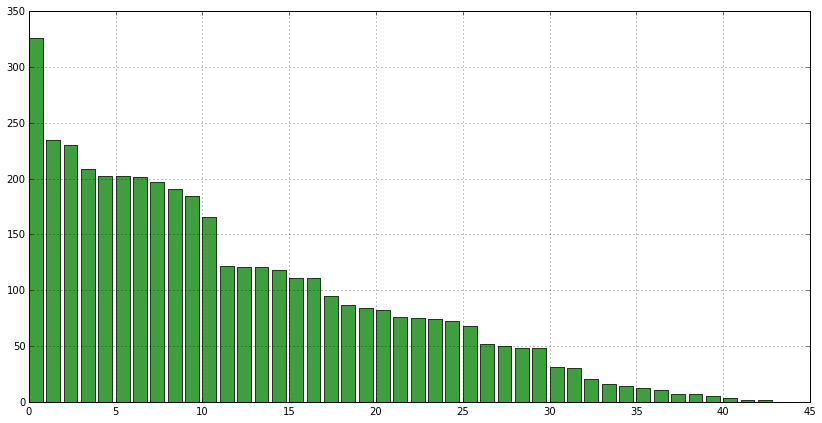

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
pairs, counts = zip(*pair_counts.most_common())
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.bar(np.arange(len(counts)), counts, color="green", alpha=0.75)
ax.grid()

In [5]:
from_counts = dict()
for k, v in zip(zip(*pairs)[0], counts):
    if k not in from_counts:
        from_counts[k] = 0
    from_counts[k] += v
sorted(from_counts.items(), key=lambda x: x[1], reverse=True)

[(2, 821),
 (23, 571),
 (16, 562),
 (39, 487),
 (37, 318),
 (33, 277),
 (11, 272),
 (40, 250),
 (28, 209),
 (22, 196),
 (41, 152),
 (0, 3)]